In [34]:
import pandas as pd

# Step 1: Read each theme's output file
growth_df = pd.read_csv('growth_theme_output.csv')
inflation_df = pd.read_csv('inflation_theme_output.csv')
policy_df = pd.read_csv('policy_theme_output.csv')
liquidity_df = pd.read_csv('liquidity_theme_output.csv')

# Step 2: Merge them all on 'Date'
merged_df = growth_df.merge(inflation_df, on='Date', how='inner')\
                     .merge(policy_df, on='Date', how='inner')\
                     .merge(liquidity_df, on='Date', how='inner')

# Step 3: Preview the combined macro fingerprint
print(merged_df.head())

         Date  Production_SubTheme_Score  Labor_SubTheme_Score  \
0  2004-01-01                      54.25                 67.27   
1  2004-02-01                      65.50                 65.88   
2  2004-03-01                      40.25                 69.20   
3  2004-04-01                      59.75                 68.68   
4  2004-05-01                      68.50                 68.85   

   Demand_SubTheme_Score  Investment_SubTheme_Score  GDP_SubTheme_Score  \
0                  29.20                      65.00               64.25   
1                  58.35                      67.25               64.25   
2                  83.60                      94.25               64.25   
3                  23.20                      23.25               69.25   
4                  65.05                      93.50               69.25   

   Growth_Theme_Score  Headline_Inflation_SubTheme_Score  \
0               54.51                          68.766746   
1               63.96           

In [35]:
def custom_label(score, theme_type):
    if theme_type == 'growth':
        if score >= 85:
            return 'Strong'
        elif score >= 70:
            return 'Moderate'
        elif score >= 50:
            return 'Neutral'
        elif score >= 35:
            return 'Weak'
        else:
            return 'Recessionary'

    elif theme_type == 'inflation':
        if score >= 85:
            return 'High'
        elif score >= 70:
            return 'Rising'
        elif score >= 50:
            return 'Stable'
        elif score >= 35:
            return 'Falling'
        else:
            return 'Low'

    elif theme_type == 'policy':
        if score >= 85:
            return 'Very Tight'
        elif score >= 70:
            return 'Tight'
        elif score >= 50:
            return 'Neutral'
        elif score >= 35:
            return 'Loose'
        else:
            return 'Very Loose'

    elif theme_type == 'liquidity':
        if score >= 85:
            return 'Very Liquid'
        elif score >= 70:
            return 'Liquid'
        elif score >= 50:
            return 'Neutral'
        elif score >= 35:
            return 'Illiquid'
        else:
            return 'Very Illiquid'


In [36]:
merged_df['Growth_Label'] = merged_df['Growth_Theme_Score'].apply(lambda x: custom_label(x, theme_type='growth'))
merged_df['Inflation_Label'] = merged_df['Inflation_Theme_Score'].apply(lambda x: custom_label(x, theme_type='inflation'))
merged_df['Policy_Label'] = merged_df['Policy_Theme_Score'].apply(lambda x: custom_label(x, theme_type='policy'))
merged_df['Liquidity_Label'] = merged_df['Liquidity_Theme_Score'].apply(lambda x: custom_label(x, theme_type='liquidity'))


In [37]:
print(merged_df[['Date',
                 'Growth_Theme_Score', 'Growth_Label',
                 'Inflation_Theme_Score', 'Inflation_Label',
                 'Policy_Theme_Score', 'Policy_Label',
                 'Liquidity_Theme_Score', 'Liquidity_Label']].tail(10))



           Date  Growth_Theme_Score Growth_Label  Inflation_Theme_Score  \
245  2024-06-01               57.53      Neutral                  35.22   
246  2024-07-01               57.05      Neutral                  45.39   
247  2024-08-01               60.74      Neutral                  44.45   
248  2024-09-01               60.50      Neutral                  44.92   
249  2024-10-01               58.07      Neutral                  48.87   
250  2024-11-01               57.72      Neutral                  50.07   
251  2024-12-01               65.89      Neutral                  49.66   
252  2025-01-01               55.20      Neutral                  76.83   
253  2025-02-01               65.08      Neutral                  62.29   
254  2025-03-01               64.14      Neutral                  39.00   

    Inflation_Label  Policy_Theme_Score Policy_Label  Liquidity_Theme_Score  \
245         Falling               75.94        Tight                  27.93   
246         Fall

In [42]:
merged_df.to_csv("macro_fingerprint_summary.csv", index=False)


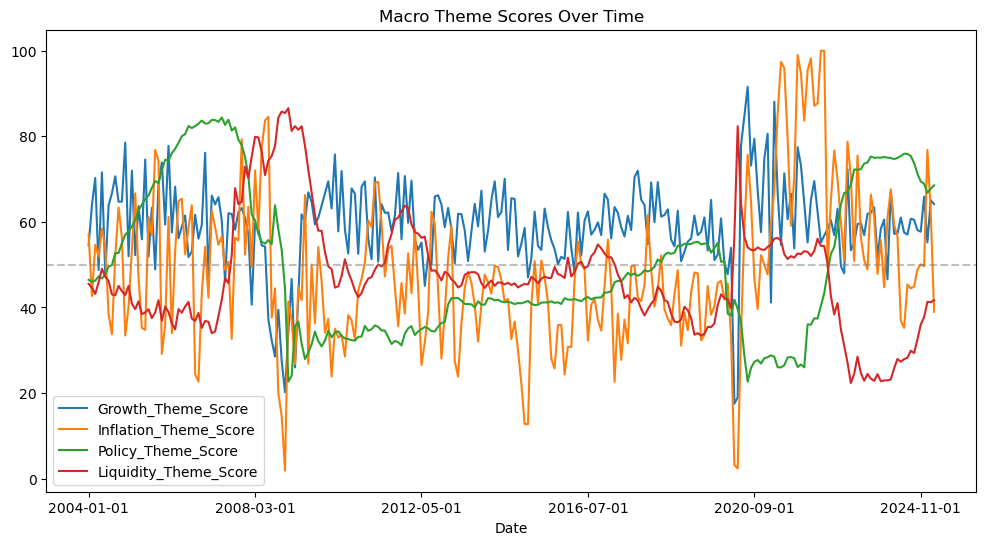

In [44]:
import matplotlib.pyplot as plt

merged_df.set_index('Date')[[
    'Growth_Theme_Score', 
    'Inflation_Theme_Score', 
    'Policy_Theme_Score', 
    'Liquidity_Theme_Score'
]].plot(figsize=(12, 6), title="Macro Theme Scores Over Time")
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.show()


In [46]:
# Example: What was happening when all themes were neutral or better?
regime = merged_df[
    (merged_df['Growth_Label'].isin(['Neutral', 'Moderate', 'Strong'])) &
    (merged_df['Inflation_Label'].isin(['Stable', 'Falling', 'Low'])) &
    (merged_df['Policy_Label'].isin(['Neutral', 'Loose', 'Very Loose'])) &
    (merged_df['Liquidity_Label'].isin(['Neutral', 'Liquid', 'Very Liquid']))
]
print(regime.tail(10))


           Date  Production_SubTheme_Score  Labor_SubTheme_Score  \
197  2020-06-01                     100.00                100.00   
199  2020-08-01                      74.25                 84.60   
200  2020-09-01                      49.00                 76.90   
201  2020-10-01                      66.50                 73.58   
202  2020-11-01                      61.00                 68.32   
203  2020-12-01                      82.25                 62.72   
204  2021-01-01                      65.50                 69.55   
206  2021-03-01                     100.00                 74.97   
211  2021-08-01                      49.25                 70.78   
222  2022-07-01                      55.50                 73.05   

     Demand_SubTheme_Score  Investment_SubTheme_Score  GDP_SubTheme_Score  \
197                  79.30                     100.00                0.00   
199                  48.45                      72.25              100.00   
200                 